<a href="https://colab.research.google.com/github/lucaschenu/Archivo-materia-IA/blob/main/WEEKLY_REPORT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#load the data
from google.colab import files
uploaded=files.upload()

Saving 01-04T184148_000_mode1.csv to 01-04T184148_000_mode1.csv


In [ ]:
# read csv file
filename= list(uploaded.keys())[0]
df=pd.read_csv(filename)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# Aplicar PCA (mantendo 2 componentes principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Reconstruir os dados a partir dos componentes principais
X_reconstructed = pca.inverse_transform(X_pca)

In [ ]:
# Calcular métricas de erro entre os dados originais e reconstruídos
mae = mean_absolute_error(X_scaled, X_reconstructed)
rmse = np.sqrt(mean_squared_error(X_scaled, X_reconstructed))
r2 = r2_score(X_scaled, X_reconstructed)
print("=== Avaliação da Reconstrução PCA ===")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

=== Avaliação da Reconstrução PCA ===
MAE  = 0.1289
RMSE = 0.1797
R²   = 0.9677


In [ ]:
#criar dataframe dos resultados do PCA
df_pca=pd.DataFrame(X_pca, columns= [f"PC{i+1}" for i in range (X_pca.shape[1])])

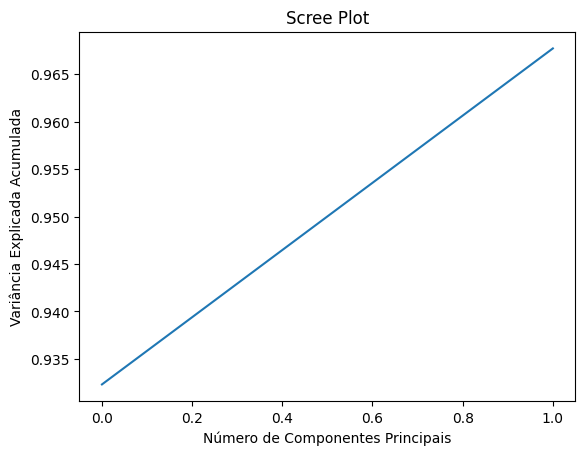

In [ ]:
#visualizar scree plot
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Scree Plot")
plt.show()

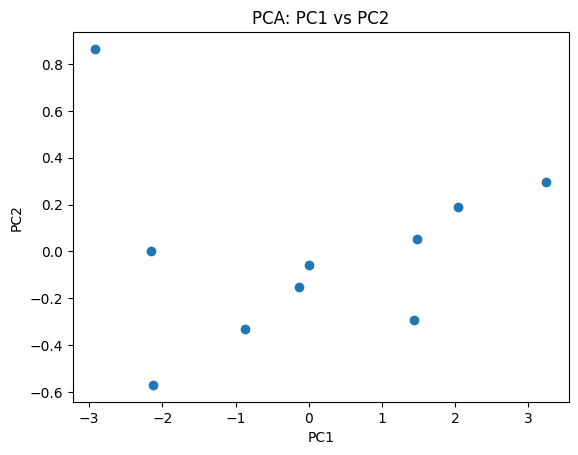

In [ ]:
#visualizar plot PCA PC1 X PC2
plt.scatter(df_pca["PC1"], df_pca["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2") # Added a title for clarity
plt.show()